In [1]:
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

BENFORD_DISTRIBUTION = [
    (1, 0.30103),
    (2, 0.176091),
    (3, 0.124939),
    (4, 0.09691),
    (5, 0.0791812),
    (6, 0.0669468),
    (7, 0.0579919),
    (8, 0.0511525),
    (9, 0.0457575)
]


url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

df = pd.read_csv(url)

In [2]:
countries_of_interst = ["China", "India", "United States", "Russia", "Brazil", "United Kingdom", "South Korea", "Japan"]

def get_data(countries_of_interst):
    data = {}

    for country in countries_of_interst:
        country_new_cases = df[df["location"]==country].fillna(0).new_cases
        data[country] = country_new_cases
    return data

data = get_data(countries_of_interst)


In [3]:
data["United States"]

49095        0.0
49096        0.0
49097        0.0
49098        0.0
49099        0.0
          ...   
49389    60160.0
49390    58549.0
49391    62978.0
49392    72058.0
49393    85329.0
Name: new_cases, Length: 299, dtype: float64

In [4]:
def get_first_digits_from_data(data):
    first_digit_data = {}
    for country, country_new_cases in data.items():
        new_cases_first_digit = [str(int(el))[0] for el in country_new_cases if el]


        new_cases_first_digit_count = Counter(new_cases_first_digit)
        size = len(country_new_cases)
        digit_count_ratio = [(int(first_digit), first_digit_count/size) for first_digit, first_digit_count in new_cases_first_digit_count.items()]
        digit_count_ratio.sort()
        first_digit_data[country] = digit_count_ratio
    return first_digit_data
first_digits_from_data = get_first_digits_from_data(data)

In [5]:
first_digits_from_data

{'Brazil': [(1, 0.19732441471571907),
  (2, 0.16722408026755853),
  (3, 0.1605351170568562),
  (4, 0.12374581939799331),
  (5, 0.07357859531772576),
  (6, 0.026755852842809364),
  (7, 0.010033444816053512),
  (8, 0.010033444816053512),
  (9, 0.013377926421404682)],
 'China': [(1, 0.28762541806020064),
  (2, 0.22742474916387959),
  (3, 0.12709030100334448),
  (4, 0.0802675585284281),
  (5, 0.056856187290969896),
  (6, 0.043478260869565216),
  (7, 0.04013377926421405),
  (8, 0.03678929765886288),
  (9, 0.043478260869565216)],
 'India': [(1, 0.16722408026755853),
  (2, 0.0802675585284281),
  (3, 0.07023411371237458),
  (4, 0.046822742474916385),
  (5, 0.07692307692307693),
  (6, 0.12040133779264214),
  (7, 0.0802675585284281),
  (8, 0.07357859531772576),
  (9, 0.0802675585284281)],
 'Japan': [(1, 0.18729096989966554),
  (2, 0.09698996655518395),
  (3, 0.11705685618729098),
  (4, 0.13712374581939799),
  (5, 0.12709030100334448),
  (6, 0.07692307692307693),
  (7, 0.043478260869565216),
  (8

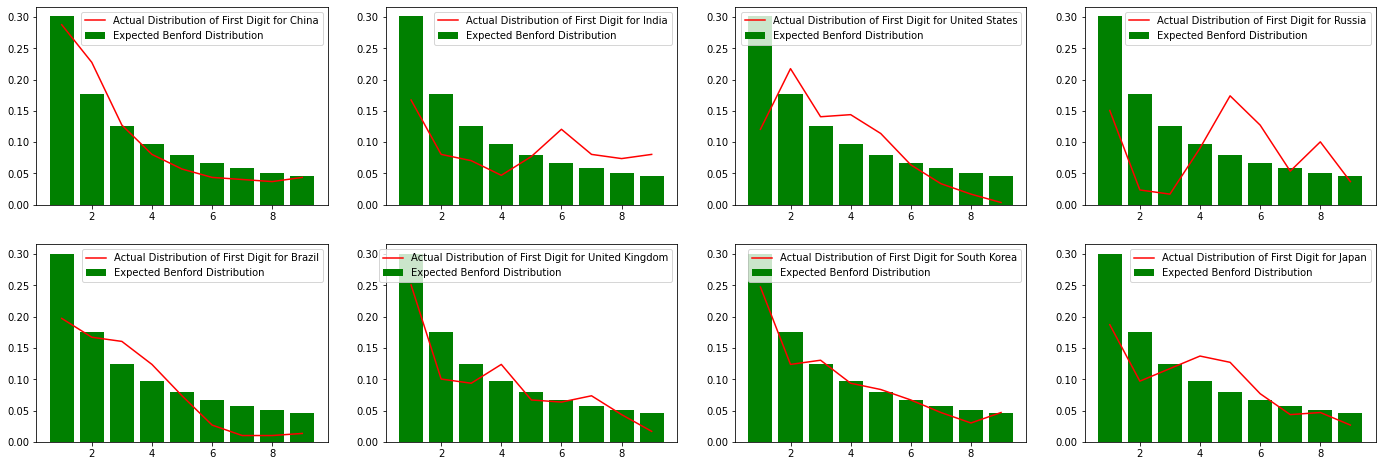

In [6]:

# Plot the Expected distribution as a bar chart, and actual a line  chart overlay
# Plot this in two rows.
def plot_data(counts_data):
    figs = plt.subplots(2, len(counts_data)//2)
    fig = figs[0]
    axes = figs[1:][0].flatten()
    fig.set_size_inches(24, 8)

    for i, state_data in enumerate(counts_data.items()):
        name, data = state_data
        # CA_DATA = STATES_DATA[STATE]
        x, y = zip(*data)
        _, benford_y = zip(*BENFORD_DISTRIBUTION)
        axes[i].bar(x, benford_y, label="Expected Benford Distribution", color="g")
        axes[i].plot(x, y, label=f"Actual Distribution of First Digit for {name}", color="r")
        axes[i].legend()

plot_data(first_digits_from_data)